<a href="https://colab.research.google.com/github/Karimkhab/introduction-to-machine-learning/blob/main/Week_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Machine Learning Pipeline Overview

The machine learning pipeline consists of several stages that transform raw data into a trained model ready for deployment. The process is often iterative, with feedback loops to refine and improve the model.

<img src="https://i.ibb.co/DgpsQnRS/ML-Pipeline.png" width="1000">


## Typical stages and common Python libraries

| Pipeline stage | Goal | Common Python tools (examples) |
|---|---|---|
| Data collection / loading | Get data from files, DBs, APIs | `pandas`, `pyarrow`, `sqlite3`, `requests` |
| Data cleaning | Fix missing values, types, outliers | `pandas`, `numpy` |
| Data exploration | Understand distributions and relationships | `pandas`, `matplotlib` |
| Feature engineering | Build useful features | `numpy`, `pandas`, `scikit-learn` (`preprocessing`) |
| Train/validation split | Separate train and evaluation data | `scikit-learn` (`model_selection`) |
| Modeling / training | Fit a model | `scikit-learn` (classical ML), `PyTorch` / `TensorFlow` (deep learning) |
| Evaluation | Measure performance with metrics | `scikit-learn` (`metrics`), `matplotlib` |


In this lab, we focus mainly on **NumPy**, **Pandas**, **Matplotlib**, and **Scikit-learn**.

# 2. Python Libraries for Machine Learning

## Install external modules
Python community offers a huge variety of modules to eliminate the need for
writing codes from scratch.
[pip](https://pypi.org/project/pip/) is a package installer for Python. You
can use pip to install packages from the Python Package Index and other indexes.

To install a package you can run this command in your terminal:
- Unix/macOS: `python3 -m pip install <package name>` or `pip3 install <package name>`
- Windows: `py -m pip install <package name>` or `pip install <package name>`

[Further reading](https://pip.pypa.io/en/stable/cli/pip_install/)
on pip usage and how to write and install requirements files.

You can also run terminal command from your jupyter notebook using
[magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

To do so, you put `!` before your command so that jupyter understand executing
it in the terminal.

In [ ]:
# https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-sx
# !pip install numpy

---
## 2.1 Numpy
While python is a powerful, it is very slow compared to C/C++ since it's and
interpreted language with dynamic typing. Numpy is python library that is
implemented in C/C++. giving us the ease of development of python with the
performance of C. depending on the operation numpy could be up to 100x faster.
Moreover, it has various functions to perform linear algebra and array operations.

[Reference](https://numpy.org/doc/stable/user/absolute_beginners.html)

In [1]:
import numpy as np

In [3]:
my_np_list = np.random.randint(low=-100, high=100, size=20)
print(my_np_list)

[-97  13  70   3  21 -49 -34 -59  73  10 -61 -90 -35  55 -33  98  -2 -59
  28   3]


Here is some of the most common used function

In [4]:
print('shape:', my_np_list.shape)
print('sum:', my_np_list.sum())
print('min:', my_np_list.min())
print('max:', my_np_list.max())
print('abs:', np.abs(my_np_list))
my_np_list.sort()
print('after .sort():', my_np_list)
print('doubling the array', my_np_list * 2) # broadcasting

shape: (20,)
sum: -145
min: -97
max: 98
abs: [97 13 70  3 21 49 34 59 73 10 61 90 35 55 33 98  2 59 28  3]
after .sort(): [-97 -90 -61 -59 -59 -49 -35 -34 -33  -2   3   3  10  13  21  28  55  70
  73  98]
doubling the array [-194 -180 -122 -118 -118  -98  -70  -68  -66   -4    6    6   20   26
   42   56  110  140  146  196]


### Task 1:
Print the mean, variance and standard deviation of `my_np_list`

In [5]:
# Solve here
my_np_list.mean(), my_np_list.var(), my_np_list.std()

(np.float64(-7.25), np.float64(2869.2875), np.float64(53.565730649362))

In [6]:
# 2D arrays
x = np.array(
    [
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
    ],
    np.int32,
)
print(x)
print(f'{x.shape = }')
print('accessing element:', x[1, 2])
print('slice of an array:', x[0:2, 2:3])
print('row:', x[0, :])
print('column:', x[:, 0])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
x.shape = (3, 4)
accessing element: 7
slice of an array: [[3]
 [7]]
row: [1 2 3 4]
column: [1 5 9]


In [7]:
# speed
from time import time

st = time()
my_list = [1] * 10000000
sum(my_list)
list_time = time()-st

st = time()
my_np_list = np.ones(10000000)
my_np_list.sum()
np_time = time()-st

print('numpy is', list_time/np_time, ' times faster than list')

numpy is 4.704204964046557  times faster than list


### Task 2:
Install the following packages: `matplotlib`, `pandas`, `seaborn` and `sklearn`

In [8]:
# Solve here
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

---
## 2.2 Matplotlib
Matplotlib is a comprehensive library for creating static, animated, and
interactive visualizations in Python.

[Reference](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)

In [9]:
import matplotlib.pyplot as plt
# to plot in side the notebook
%matplotlib inline

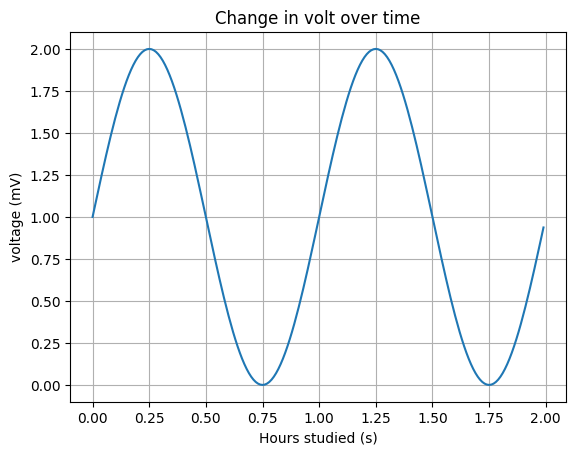

In [10]:
# Line plot
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Hours studied (s)', ylabel='voltage (mV)',
       title='Change in volt over time')
ax.grid()
plt.show() # Show the plot

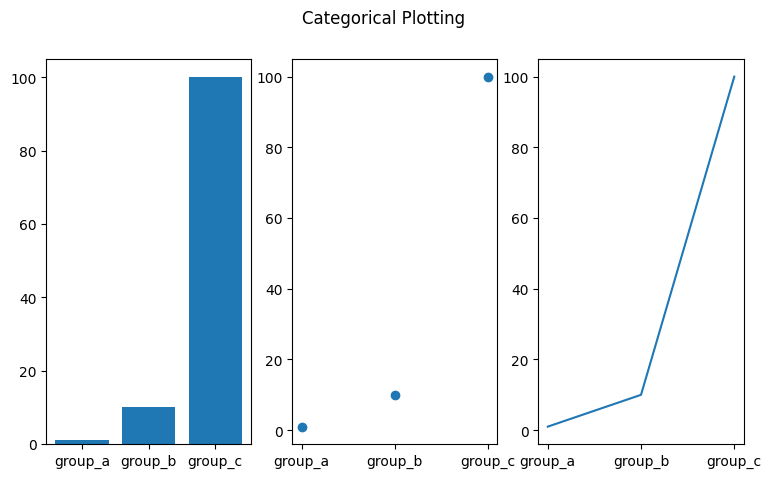

In [11]:
# different plots for categorical data
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 5))

plt.subplot(131)  # To create 1 by 3 grid and plot in the 1st subplot
plt.bar(names, values)
plt.subplot(132)  # plot in the 2nd subplot
plt.scatter(names, values)
plt.subplot(133)  # plot in the 3nd subplot
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

---
## 2.3 Pandas
[Pandas](https://pandas.pydata.org/docs/) is a fast, powerful, flexible and
easy to use open source data analysis and manipulation tool.


In [12]:
import pandas as pd

In [16]:
df = pd.read_csv('/petrol_consumption.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [17]:
df.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [18]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [19]:
# access a columns
print(df['Petrol_tax'].head())
print(df[['Average_income', 'Paved_Highways']].head())

0    9.0
1    9.0
2    9.0
3    7.5
4    8.0
Name: Petrol_tax, dtype: float64
   Average_income  Paved_Highways
0            3571            1976
1            4092            1250
2            3865            1586
3            4870            2351
4            4399             431


In [20]:
# access a rows
df.iloc[[1, 2, 4]]

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
4,8.0,4399,431,0.544,410


In [21]:
# dropping a column
new_df = df.drop(['Average_income', 'Paved_Highways'], axis=1)
new_df.head()

,Petrol_tax,Population_Driver_licence(%),Petrol_Consumption
0,9.0,0.525,541
1,9.0,0.572,524
2,9.0,0.580,561
3,7.5,0.529,414
4,8.0,0.544,410


In [22]:
# Drop a row by index
new_df = df.drop([0, 1])
new_df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344


In [24]:
# pandas support many operations similar to numpy
print(f"Sum of columns  {df.sum()}\n")
print(f"Sum of all the data frame {df.sum().sum()}\n")
print(f"Mean of columns {df.mean()}")
print(f"Converting dataframe to numpy array {type(df.to_numpy())}")

Sum of columns  Petrol_tax                         368.080
Average_income                  203608.000
Paved_Highways                  267140.000
Population_Driver_licence(%)        27.376
Petrol_Consumption               27685.000
dtype: float64

Sum of all the data frame 498828.45599999995

Mean of columns Petrol_tax                         7.668333
Average_income                  4241.833333
Paved_Highways                  5565.416667
Population_Driver_licence(%)       0.570333
Petrol_Consumption               576.770833
dtype: float64
Converting dataframe to numpy array <class 'numpy.ndarray'>


---
## 2.4 SKLearn

[SKLearn](https://scikit-learn.org/stable/modules/classes.html) is a simple
and efficient tools for predictive data analysis.
We will use it for classification, regression and clustering algorithms.

Usually datasets have two parts, data(or features) and targets(or labels).
We train our machine learning model to predict the target of a sample given
its features.

In [31]:
# sklearn has some datasets inside it to learn and test on them
from sklearn import datasets
iris = datasets.load_iris()
print(f'Dataset shape: {iris.data.shape = }, {iris.target.shape = }')
print(f'Example of a sample: features: {iris.data[0]}, classification: {iris.target[0]}')

Dataset shape: iris.data.shape = (150, 4), iris.target.shape = (150,)
Example of a sample: features: [5.1 3.5 1.4 0.2], classification: 0


SKLearn gives a simple API to build models. Mainly it consists of two steps:
- Model creation: where we choose the model and set its parameters
- Fitting the data: Where we give our model the training data to learn from
- Prediction: where we can predict the label of a sample

`svm` is a prediction model(we will study how it works later in the course).

Here is an example on how to use an SKLearn model:

In [26]:
from sklearn import svm
# setting the parameters needed by the algorithm
clf = svm.SVC(gamma=0.001, C=100.)
# Training on all the data except the last one
clf.fit(iris.data[:-1], iris.target[:-1])
# predicting the last sample
print('Our prediction', clf.predict(iris.data[-1:]), 'True value:', iris.target[-1:])

Our prediction [2] True value: [2]


In [47]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [51]:
iris.data[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

---
# 3. Self-Practice
Using the iris dataset used in the lab, plot each feature and the target data
using matplotlib.
Write your observation on the relationship between the target and each feature.
What do you think is the most important features? Why?

In [55]:
target = iris.target

In [94]:
def plot_scatter_index(feature_index, x = range(len(iris.data[:, feature_index])), y = iris.data[:, feature_index]):

    feature_name = iris.feature_names[feature_index]

    fig, ax = plt.subplots()

    scatter = ax.scatter(x, y, c=iris.target, cmap='viridis')
    handles, _ = scatter.legend_elements()
    ax.legend(handles=handles, labels=list(iris.target_names), title="Classes")

    # 3. Используем название в заголовке и осях
    plt.title(f'Iris: {feature_name} by class')
    plt.xlabel('Sample index')
    plt.ylabel(feature_name)

    plt.show()

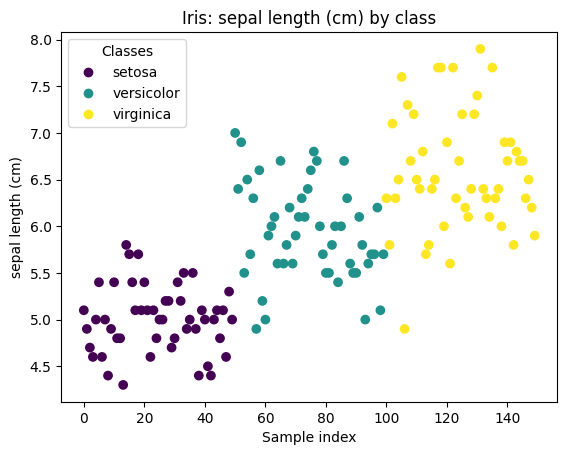

In [95]:
plot_scatter_index(0)

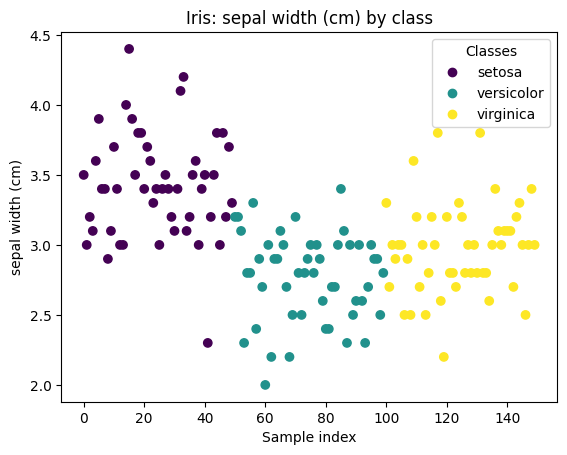

In [88]:
plot_scatter_index(1)

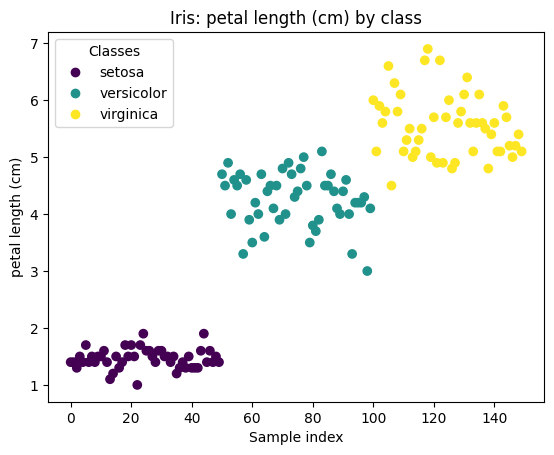

In [89]:
plot_scatter_index(2)

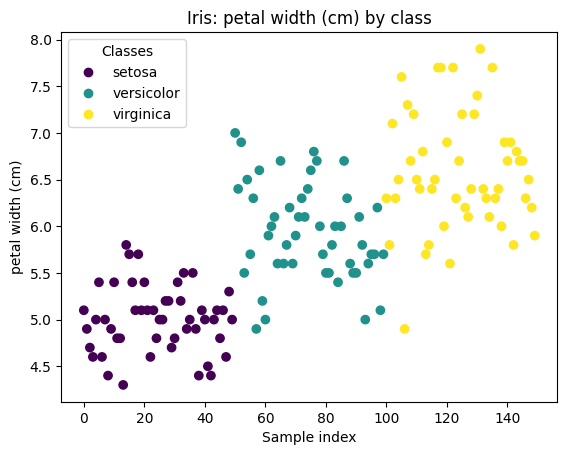

In [100]:
plot_scatter_index(3)

In [96]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [101]:
def plot_h_w_compr(x_id, y_id):
    x = iris.data[:, x_id]
    y = iris.data[:, y_id]

    x_feature_name = iris.feature_names[x_id]
    y_feature_name = iris.feature_names[y_id]

    fig, ax = plt.subplots()

    scatter = ax.scatter(x, y, c=iris.target, cmap='viridis')
    handles, _ = scatter.legend_elements()
    ax.legend(handles=handles, labels=list(iris.target_names), title="Classes")

    # 3. Используем название в заголовке и осях
    plt.title(f'Iris: {x_feature_name} vs {y_feature_name}')
    plt.xlabel(x_feature_name)
    plt.ylabel(y_feature_name)

    plt.show()

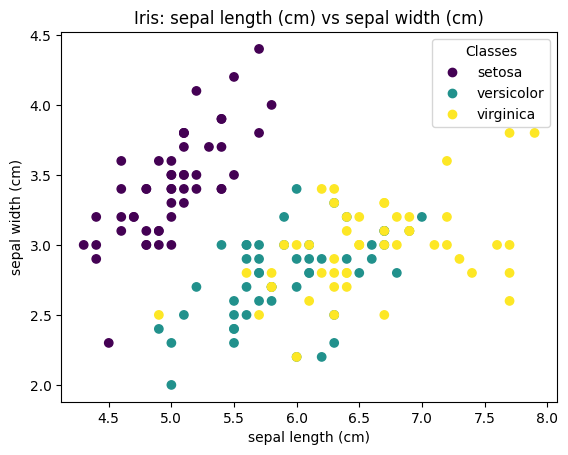

In [102]:
plot_h_w_compr(0,1)

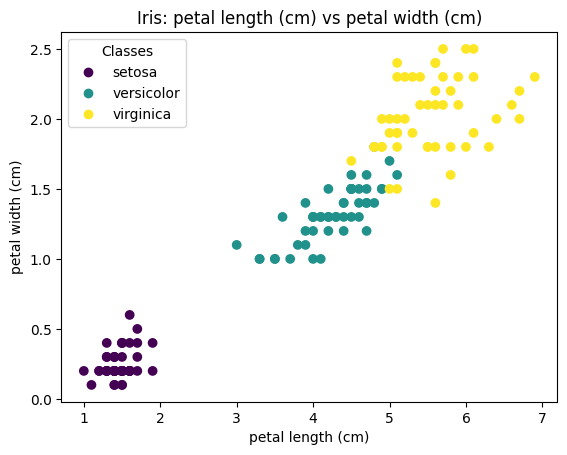

In [103]:
plot_h_w_compr(2,3)

([<matplotlib.axis.YTick at 0x7968834eab70>,
 [Text(0, 0, 'sepal length (cm)'),
  Text(0, 1, 'sepal width (cm)'),
  Text(0, 2, 'petal length (cm)'),
  Text(0, 3, 'petal width (cm)')])

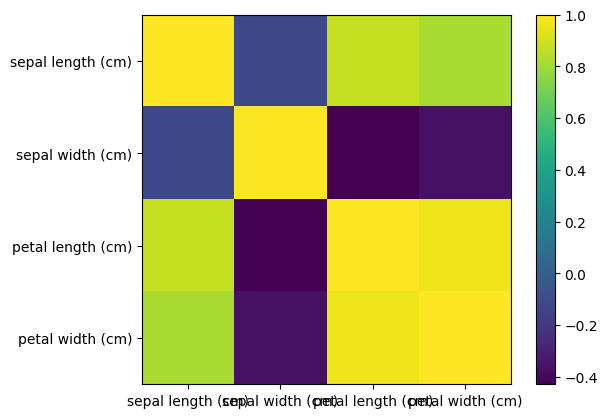

In [111]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
cors = df.corr()
plt.imshow(cors)
plt.colorbar()
plt.xticks(range(len(cors.columns)), cors.columns)
plt.yticks(range(len(cors.columns)), cors.columns)

<Axes: >

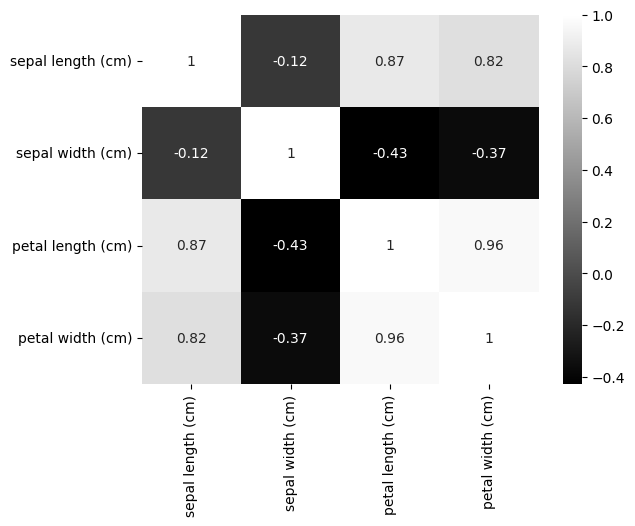

In [134]:
import seaborn as sns
sns.heatmap(cors, annot = True, cmap='gray')


<BarContainer object of 3 artists>

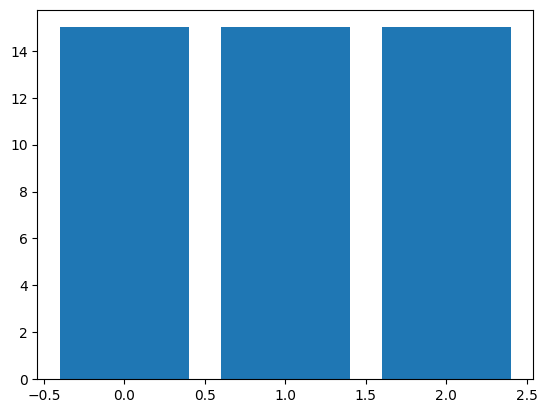

In [116]:
plt.bar(np.unique(iris.target), height = 15)